Import package

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from numpy import sqrt
from sklearn.model_selection import cross_val_score
# from sklearn import datasets, linear_model

import dataset ,dan menampilkan 5 data terakhir

In [2]:
df=pd.read_csv("winequalityN.csv")
df.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


## Data Cleaning

mengatasi data null

In [3]:
df["fixed acidity"].fillna(df["fixed acidity"].mean(), inplace=True)
df["volatile acidity"].fillna(df["volatile acidity"].mean(), inplace=True)
df["citric acid"].fillna(df["citric acid"].mean(), inplace=True)
df["residual sugar"].fillna(df["residual sugar"].mean(), inplace=True)
df["chlorides"].fillna(df["chlorides"].mean(), inplace=True)
df["pH"].fillna(df["pH"].mean(), inplace=True)
df["sulphates"].fillna(df["sulphates"].mean(), inplace=True)

In [4]:
# df.drop_duplicates(inplace=True)

mengatasi data duplikat

In [5]:
df.duplicated().sum()

1168

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Melakukan one hot endocing

In [7]:
enc=pd.get_dummies(df[['type']])
df=df.join(enc)
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6,0,1
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6,0,1
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6,0,1
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,0,1
6,white,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.470000,9.6,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.820000,9.5,6,1,0
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,1,0
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6,1,0
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,1,0


### MENGHILANGKAN OUTLIER

In [8]:
from scipy import stats
import numpy as np

df = df[(np.abs(stats.zscore(df.select_dtypes(['int64' , 'float64']))) <3).all(axis=1)]
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6,0,1
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6,0,1
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,0,1
6,white,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.470000,9.6,6,0,1
9,white,8.1,0.220,0.43,1.5,0.044,28.0,129.0,0.99380,3.22,0.450000,11.0,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.820000,9.5,6,1,0
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,1,0
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6,1,0
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,1,0


# A. SUPERVISED LEARNING

In [9]:
x = df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','density','pH','sulphates','type_red','type_white']]
y = df['quality']

### Standarisasi

In [10]:
scaler = StandardScaler()
scaler.fit(x)
x_standard = scaler.transform(x)
x = x_standard

### A1 Linear Regression

membagi dataset

In [11]:
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=800
)

melatih model pada data pelatihan

In [12]:
lr = LinearRegression() 
lr.fit(x_train, y_train)

LinearRegression()

### A2 Melakukan Evaluasi Model

In [13]:
# Melakukan Prediksi
y_pred = lr.predict(x_test)

print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2-Squared :", r2_score(y_test, y_pred))



MAE : 0.5685921119797365
MSE : 0.5161321931991482
RMSE : 0.7184234080256212
R2-Squared : 0.3290869590976281


### Kesimpulannya adalah bahwa model regresi linear yang saya baut kurang baik dalam memprediksi nilai target pada data pengujian. Model ini kurang mampu menjelaskan sebagian besar variasi dalam data (R2-Score yang rendah), dan kesalahan prediksi yang dihasilkan (MAE, MSE, dan RMSE yang rendah) cukup besar. 

### A3. PLOT HASIL PREDIKSI

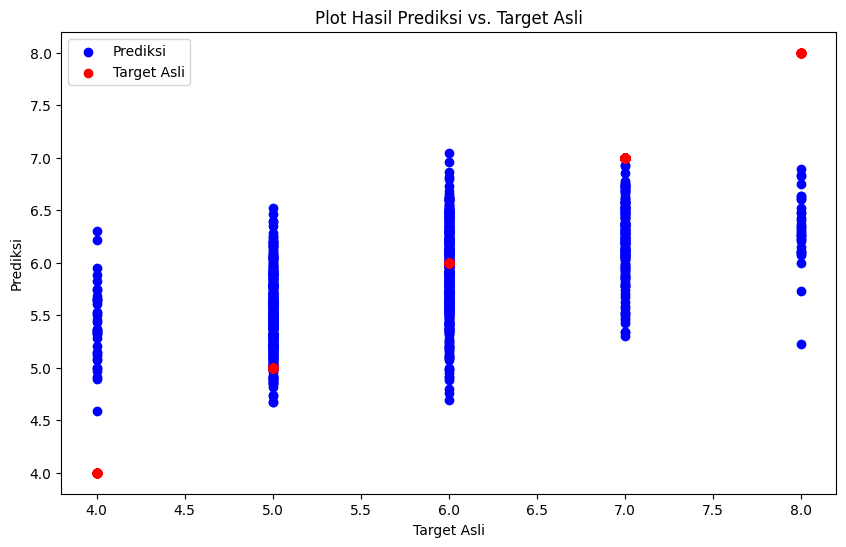

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Prediksi', marker='o')  # Warna biru untuk prediksi
plt.scatter(y_test, y_test, color='red', label='Target Asli', marker='o')  # Warna merah untuk target asli
plt.xlabel('Target Asli')
plt.ylabel('Prediksi')
plt.title('Plot Hasil Prediksi vs. Target Asli')
plt.legend()
plt.show()


# B. Unsupervised Learning

### B1

### Implementasikan metode K-Means

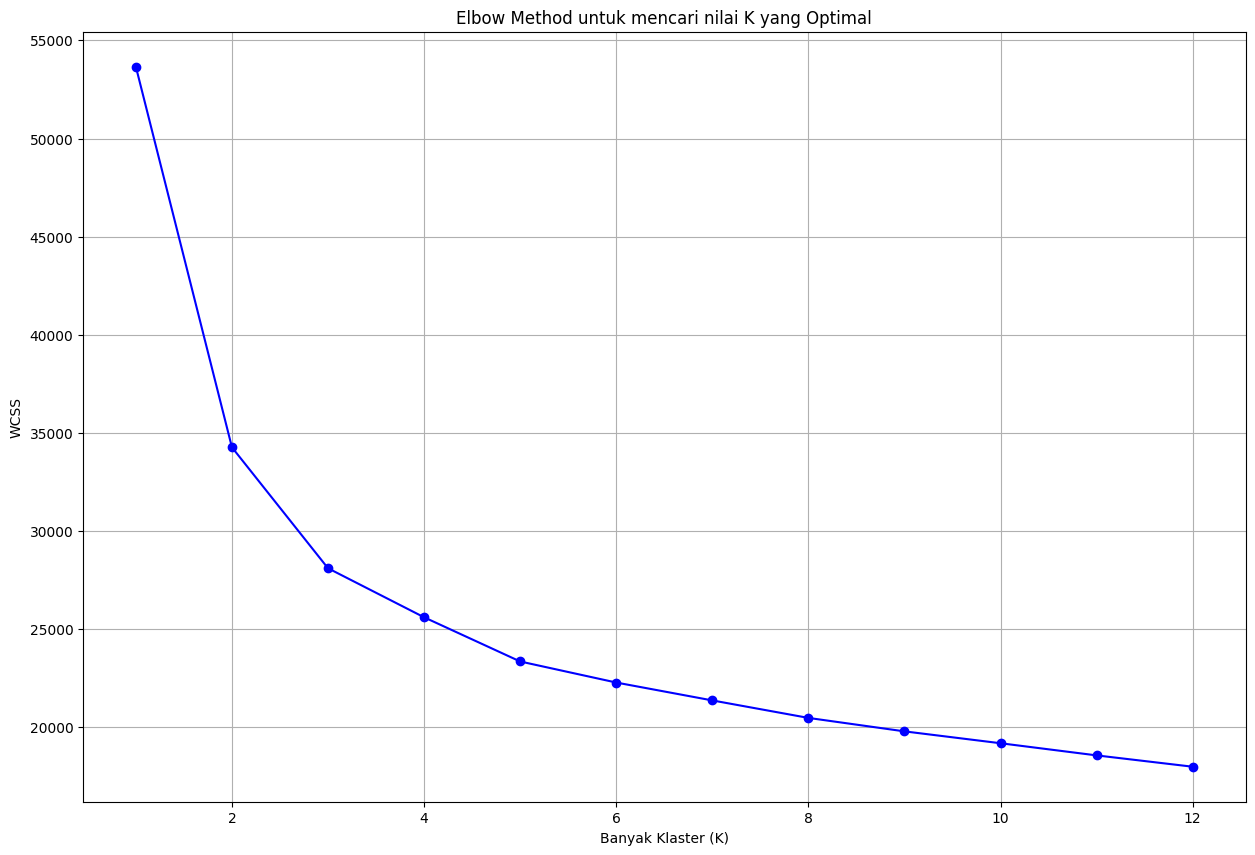

In [15]:
from sklearn.cluster import KMeans

X = x
wcss = []

for k in range(1, 13):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)

plt.figure(figsize=(15, 10))
plt.plot(range(1, 13), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method untuk mencari nilai K yang Optimal')
plt.xlabel('Banyak Klaster (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [16]:
X

array([[-0.73884869, -0.20640968,  0.21085923, ..., -0.24521566,
        -0.53515643,  0.53515643],
       [ 0.9463113 , -0.34009037,  0.65750155, ..., -0.63756752,
        -0.53515643,  0.53515643],
       [ 0.10373131, -0.6742921 ,  0.06197846, ..., -0.951449  ,
        -0.53515643,  0.53515643],
       ...,
       [-1.11332868,  1.46459894, -1.57571001, ...,  0.07820119,
         1.86861251, -1.86861251],
       [-1.11332868,  2.09958222, -1.42682924, ...,  1.4811325 ,
         1.86861251, -1.86861251],
       [-1.01970868, -0.13956934,  1.17858424, ...,  1.08878064,
         1.86861251, -1.86861251]])

## B2

### MELAKUKAN EVALUASI CLUSTERING TANPA LABEL ASLI

In [17]:

km = KMeans(n_clusters=2, n_init = 10, random_state=0)
km.fit(X)
predicted_labels = km.predict(X)

silhouette_avg = silhouette_score(X, predicted_labels)
print(f"Silhouette Score: {silhouette_avg}")

calinski_score = calinski_harabasz_score(X, predicted_labels)
print(f"Calinski-Harabasz Score: {calinski_score}")

davies_bouldin = davies_bouldin_score(X, predicted_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")

Silhouette Score: 0.40868202826494865
Calinski-Harabasz Score: 2760.44927392135
Davies-Bouldin Index: 1.0517592706257046


### Kesimpulannya, hasil clustering yang dihasilkan oleh model K-Means pada data yang saya buat kurang baik. 

### MELAKUKAN EVALUASI CLUSTERING DENGAN LABEL ASLI

In [18]:
true_labels = df['quality']

ari = adjusted_rand_score(true_labels, predicted_labels)
nmi = normalized_mutual_info_score(true_labels, predicted_labels)
homogeneity = homogeneity_score(true_labels, predicted_labels)
completeness = completeness_score(true_labels, predicted_labels)

print(f"Adjusted Rand Index: {ari}")
print(f"Normalized Mutual Information: {nmi}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")

Adjusted Rand Index: -0.002720724111105463
Normalized Mutual Information: 0.010941507354206306
Homogeneity: 0.007790252295613558
Completeness: 0.018374036117839564


### Kesimpulannya, hasil clustering yang di hasilkan dengan model K-Means kurang baik dan kurang sesuai dengan label asli. Nilai-nilai metrik evaluasi yang rendah menunjukkan bahwa pengelompokan yang dilakukan memiliki tingkat kesesuaian yang tinggi dengan kelas asli dalam data.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10516\2338565601.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clusters"] = cluster_labels


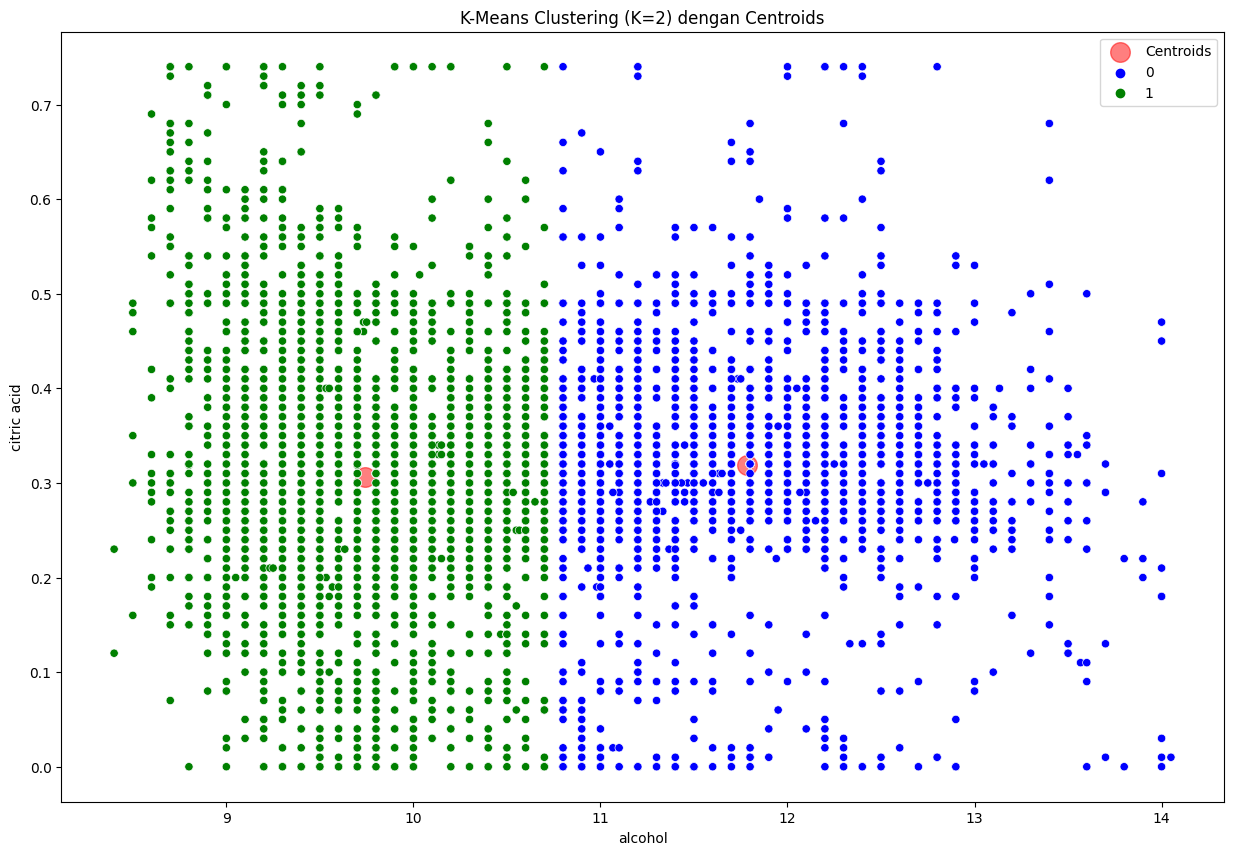

In [19]:
plt.figure(figsize=(15,10))

X = df[['alcohol' , 'citric acid' ]]
K = 2 
kmeans = KMeans(n_clusters=K, n_init=10) 
kmeans.fit(X) 
cluster_labels = kmeans.labels_ 
df["clusters"] = cluster_labels 
centroids = kmeans.cluster_centers_ 
warna = ["blue", "green"]
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='red', s=200,label='Centroids')

sns.scatterplot(data=df, x='alcohol', y='citric acid', hue="clusters", palette=warna)

plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel('alcohol')
plt.ylabel('citric acid')
plt.legend()
plt.show()

### B3

### PLOT DARI HASIL CLUSTERING

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10516\3168108662.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clusters"] = cluster_labels


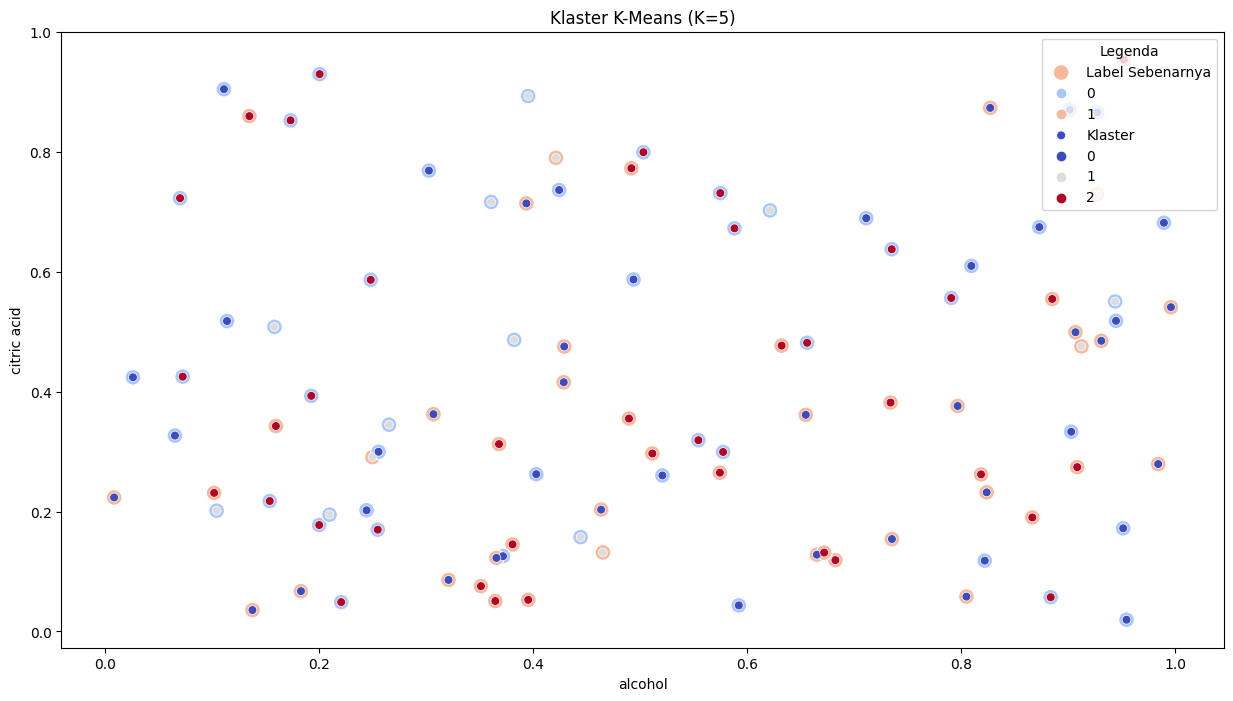

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

quality = 'quality'
alcohol = 'alcohol'
citric = 'citric acid'

K=5
kmeans = KMeans(n_clusters=K, n_init=10) 
kmeans.fit(X) 
cluster_labels = kmeans.labels_ 
df["clusters"] = cluster_labels 

# Data sampel untuk klaster dan label sebenarnya
df = pd.DataFrame({
    'alcohol': np.random.rand(100),
    'citric acid': np.random.rand(100),
    'quality': np.random.randint(0, 2, 100),
    'clusters': np.random.randint(0, 3, 100)
})

# Pemetaan klaster
pemetaan_klaster = {0: 1, 1: 0, 2: 2}
df["klaster2"] = df["clusters"].map(pemetaan_klaster)

plt.figure(figsize=(15, 8))

sns.scatterplot(data=df, x=alcohol, y=citric,
                hue=quality, marker="o", s=130, palette="coolwarm", label="Label Sebenarnya")

# Plot klaster menggunakan pemetaan klaster
sns.scatterplot(data=df, x=alcohol, y=citric,
                hue="klaster2", marker="o", s=40, palette="coolwarm", label="Klaster")

plt.title("Klaster K-Means (K=5)")
plt.xlabel(alcohol)
plt.ylabel(citric)
plt.legend(title="Legenda", loc="upper right")
plt.show()
